<a href="https://colab.research.google.com/github/psrana/Machine-Learning-using-PyCaret/blob/main/01_PyCaret_for_Regression_with_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PyCaret for Regression**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering

---

### **Self learning resource**
1. Tutorial on Pycaret **<a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a>** 

2. Documentation on Pycaret-Regression: **<a href="https://pycaret.org/regression/"> Click Here </a>**

---

### **In this tutorial we will learn:**

- Getting Data: How to import data from PyCaret repository
- Setting up Environment: How to setup an experiment in PyCaret and get started with building regression models
- Create Model: How to create a model, perform cross validation and evaluate regression metrics
- Tune Model: How to automatically tune the hyperparameters of a regression model
- Plot Model: How to analyze model performance using various plots
- Finalize Model: How to finalize the best model at the end of the experiment
- Predict Model: How to make prediction on new / unseen data
- Save / Load Model: How to save / load a model for future use

---



### **(a) Install Pycaret**

In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


### **(b) Get the version of the pycaret**

In [2]:
from pycaret.utils import version
version()

'2.3.1'

---
# **1. Regression: Basics**
---
### **1.1 Get the list of datasets available in pycaret (55)**




In [3]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.2 Get the "boston" dataset**
---

In [4]:
bostonDataSet = get_data("boston")    # SN is 46
# Boston is regression dataset.
# The values in "medv" columns are continuous values

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


---
### **1.3 "Parameter setting"  for all regression models**
##### **Train/Test division, applying data pre-processing** {Sampling, Normalization, Transformation, PCA, Handaling of Outliers, Feature Selection}
---

In [5]:
from pycaret.regression import *
s = setup(data =  bostonDataSet, target='medv', train_size=0.7, silent=True)

,Description,Value
0,session_id,536
1,Target,medv
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 21)"


---
### **1.4 "Run and Compare" the model performance**
---

In [6]:
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.3173,10.0895,3.1363,0.8747,0.1488,0.1187,0.097
rf,Random Forest Regressor,2.4087,11.6782,3.3875,0.8534,0.1494,0.1197,0.509
et,Extra Trees Regressor,2.3359,12.4217,3.4243,0.8455,0.1465,0.1136,0.449
lightgbm,Light Gradient Boosting Machine,2.6172,14.4879,3.7309,0.8257,0.1611,0.1274,0.086
ada,AdaBoost Regressor,2.9699,16.1288,3.9602,0.7920,0.1846,0.1573,0.099
dt,Decision Tree Regressor,3.1768,22.0911,4.6005,0.7225,0.2026,0.1582,0.020
lr,Linear Regression,3.6617,26.8772,5.1237,0.6627,0.2572,0.1837,0.288
ridge,Ridge Regression,3.6197,27.0494,5.1359,0.6589,0.2699,0.1825,0.013
lar,Least Angle Regression,3.7589,27.6745,5.1935,0.6494,0.2614,0.1885,0.016
br,Bayesian Ridge,3.6566,27.9096,5.2123,0.6494,0.2698,0.1844,0.015


---
### **1.5 "Three line of code" for model comparison for "Insurance" dataset**
---



In [7]:
from pycaret.datasets import get_data
from pycaret.regression import *

insuranceDataSet = get_data("insurance")
s = setup(data = insuranceDataSet, target='charges', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2649.5350,2.205288e+07,4662.6999,0.8349,0.4559,0.3236,0.093
lightgbm,Light Gradient Boosting Machine,2908.6145,2.396559e+07,4856.4450,0.8205,0.5476,0.3610,0.054
rf,Random Forest Regressor,2813.1697,2.482793e+07,4943.1142,0.8135,0.4818,0.3373,0.553
ada,AdaBoost Regressor,3913.9045,2.624024e+07,5099.4278,0.8036,0.6007,0.6564,0.036
et,Extra Trees Regressor,2850.8228,2.891295e+07,5328.7649,0.7817,0.5041,0.3409,0.499
ridge,Ridge Regression,4195.0648,3.652175e+07,6016.9897,0.7289,0.5995,0.4297,0.015
llar,Lasso Least Angle Regression,4178.9567,3.650166e+07,6014.4854,0.7289,0.5621,0.4275,0.016
br,Bayesian Ridge,4192.9836,3.652782e+07,6017.4354,0.7288,0.5922,0.4292,0.016
lasso,Lasso Regression,4184.9596,3.653051e+07,6017.4247,0.7287,0.5786,0.4277,0.015
lr,Linear Regression,4185.5084,3.653869e+07,6018.1085,0.7286,0.5794,0.4276,0.014


---
### **1.6 "Three line of code" for model comparison for "House" dataset**
---



In [8]:
from pycaret.datasets import get_data
from pycaret.regression import *

houseDataSet = get_data("house")
s = setup(data = houseDataSet, target='SalePrice', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.787614e+04,9.394228e+08,2.960952e+04,8.496000e-01,0.1426,0.1030,0.248
gbr,Gradient Boosting Regressor,1.713696e+04,9.128771e+08,2.859246e+04,8.394000e-01,0.1372,0.1002,0.776
rf,Random Forest Regressor,1.822645e+04,1.002533e+09,3.048983e+04,8.389000e-01,0.1508,0.1078,2.392
et,Extra Trees Regressor,2.209147e+04,1.257738e+09,3.468524e+04,8.042000e-01,0.1742,0.1281,2.538
omp,Orthogonal Matching Pursuit,1.763228e+04,1.109013e+09,3.026492e+04,7.918000e-01,0.1473,0.1050,0.041
ada,AdaBoost Regressor,2.507338e+04,1.465074e+09,3.736646e+04,7.586000e-01,0.2027,0.1620,0.501
ridge,Ridge Regression,1.951468e+04,1.486583e+09,3.504335e+04,7.192000e-01,0.1769,0.1155,0.072
lasso,Lasso Regression,2.049812e+04,1.590268e+09,3.645972e+04,6.982000e-01,0.2092,0.1239,0.209
en,Elastic Net,2.109706e+04,1.729284e+09,3.737052e+04,6.903000e-01,0.1663,0.1224,0.215
knn,K Neighbors Regressor,2.960288e+04,2.301210e+09,4.597089e+04,6.642000e-01,0.2220,0.1705,0.101


---
# **2. Regression: working with user dataset**
---
#### **2.1 Uploading "user file" from user system**

In [9]:
from google.colab import files
#files.upload()                     # Uncomment this line

#### **2.2 "Read" the uploaded file**

In [10]:
import pandas as pd
#myDataSet = pd.read_csv('Sample1 - Regression data.csv')        # Uncomment this line and replace the file name that read in above step
#myDataSet.head()                                                # Uncomment this line

#### **2.3 "Compare" the model performance**

In [11]:
from pycaret.regression import *

#s = setup(data = myDataSet, target='RMSD', silent=True)               # Uncomment this line
#cm = compare_models()                                                 # Uncomment this line

#### **2.4 "Three line of code" for model comparison for "user dataset**

##### Use it, while working on **"Anaconda/Jupyter notebook"** on local machine

In [12]:
from pycaret.regression import *
import pandas as pd

#myDataSet = pd.read_csv("myData.csv")                          # Uncomment this line
#s = setup(data = myDataSet, target='cancer', silent=True)      # Uncomment this line
#cm = compare_models()                                          # Uncomment this line

---
# **3. Regression: Apply "Data Preprocessing"**
---

### **3.1 Model performance using "Normalization"**

In [13]:
s = setup(data = bostonDataSet, target = 'medv', normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

#normalize_method = {zscore, minmax, maxabs, robust}

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1645,10.4449,3.0679,0.8805,0.1387,0.1090,0.441
gbr,Gradient Boosting Regressor,2.1926,10.5228,3.0813,0.8752,0.1474,0.1136,0.097
lightgbm,Light Gradient Boosting Machine,2.2849,12.1878,3.3057,0.8594,0.1478,0.1143,0.042
rf,Random Forest Regressor,2.3980,13.0575,3.4111,0.8487,0.1537,0.1214,0.523
knn,K Neighbors Regressor,2.6848,14.7945,3.7219,0.8277,0.1612,0.1291,0.064
ada,AdaBoost Regressor,2.7309,15.4618,3.7551,0.8183,0.1692,0.1393,0.106
br,Bayesian Ridge,3.2933,21.8649,4.5559,0.7419,0.2371,0.1691,0.015
ridge,Ridge Regression,3.3300,21.8829,4.5670,0.7415,0.2373,0.1709,0.015
lr,Linear Regression,3.3445,21.9401,4.5765,0.7407,0.2377,0.1716,0.016
huber,Huber Regressor,3.1960,22.7114,4.6193,0.7364,0.2391,0.1613,0.027


### **3.2 Model performance using "Feature Selection"**

In [14]:
s = setup(data = bostonDataSet, target = 'medv', feature_selection = True, feature_selection_threshold = 0.9, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1591,12.1391,3.2652,0.8521,0.1475,0.1119,0.451
gbr,Gradient Boosting Regressor,2.3696,13.1697,3.4453,0.8353,0.1564,0.1230,0.098
rf,Random Forest Regressor,2.3710,14.7939,3.5742,0.8241,0.1611,0.1227,0.503
lightgbm,Light Gradient Boosting Machine,2.3899,13.9882,3.5809,0.8213,0.1663,0.1257,0.039
ada,AdaBoost Regressor,2.7834,17.5914,3.9329,0.7956,0.1839,0.1492,0.101
ridge,Ridge Regression,3.2841,22.9096,4.6521,0.7186,0.2466,0.1722,0.014
lr,Linear Regression,3.3091,22.8192,4.6565,0.7179,0.2459,0.1726,0.015
br,Bayesian Ridge,3.2984,23.3443,4.6895,0.7146,0.2432,0.1726,0.014
dt,Decision Tree Regressor,3.1858,24.3847,4.7523,0.6959,0.2211,0.1686,0.018
en,Elastic Net,3.7051,28.0440,5.1891,0.6595,0.2538,0.1815,0.016


### **3.3 Model performance using "Outlier Removal"**

In [15]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1491,8.4186,2.8627,0.8863,0.1417,0.1138,0.093
et,Extra Trees Regressor,2.1180,9.8482,3.0488,0.8689,0.1420,0.1094,0.446
rf,Random Forest Regressor,2.2799,10.3158,3.1556,0.8592,0.1492,0.1187,0.506
ada,AdaBoost Regressor,2.7176,13.2707,3.5795,0.8186,0.1748,0.1475,0.098
lightgbm,Light Gradient Boosting Machine,2.5744,13.9271,3.6780,0.8119,0.1663,0.1302,0.039
dt,Decision Tree Regressor,3.0042,17.6564,4.1142,0.7524,0.1972,0.1622,0.018
lr,Linear Regression,3.3757,23.7350,4.7729,0.6921,0.2669,0.1693,0.014
lar,Least Angle Regression,3.3893,23.8414,4.7857,0.6908,0.2678,0.1701,0.017
ridge,Ridge Regression,3.3378,23.9185,4.7830,0.6900,0.2681,0.1680,0.015
br,Bayesian Ridge,3.3337,24.4457,4.8282,0.6831,0.2593,0.1676,0.014


---
### **3.4 Model performance using "Transformation"**
---

In [16]:
s = setup(data = bostonDataSet, target = 'medv', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0560,9.3079,2.9189,0.8623,0.1323,0.1043,0.451
gbr,Gradient Boosting Regressor,2.2798,12.2584,3.3369,0.8171,0.1475,0.1152,0.097
rf,Random Forest Regressor,2.2915,13.9695,3.4842,0.7980,0.1528,0.1179,0.517
lightgbm,Light Gradient Boosting Machine,2.4724,15.4918,3.7720,0.7691,0.1646,0.1262,0.040
ada,AdaBoost Regressor,2.8030,17.4269,4.0068,0.7423,0.1796,0.1470,0.100
knn,K Neighbors Regressor,3.0829,21.8708,4.5111,0.7203,0.1871,0.1465,0.064
br,Bayesian Ridge,3.5329,22.8721,4.7395,0.6601,0.2329,0.1820,0.015
ridge,Ridge Regression,3.5785,22.9097,4.7512,0.6571,0.2335,0.1842,0.014
lr,Linear Regression,3.5956,22.9771,4.7601,0.6555,0.2338,0.1850,0.014
lar,Least Angle Regression,3.6277,23.2708,4.7941,0.6494,0.2345,0.1862,0.019


---
### **3.5 Model performance using "PCA"**
---

In [17]:
s = setup(data = bostonDataSet, target = 'medv', pca = True, pca_method = 'linear', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,4.6434,42.4815,6.4009,0.4592,0.2642,0.2272,0.451
et,Extra Trees Regressor,4.5876,44.8166,6.5511,0.4383,0.2705,0.2287,0.400
lightgbm,Light Gradient Boosting Machine,4.8301,44.8612,6.5640,0.4370,0.2664,0.2321,0.032
knn,K Neighbors Regressor,4.7437,46.4930,6.6592,0.4163,0.2720,0.2324,0.061
gbr,Gradient Boosting Regressor,4.9111,49.1482,6.8058,0.3923,0.2766,0.2394,0.058
lr,Linear Regression,5.3565,53.9474,7.1743,0.3249,0.2849,0.2543,0.014
lasso,Lasso Regression,5.3589,53.9503,7.1749,0.3249,0.2850,0.2545,0.015
ridge,Ridge Regression,5.3565,53.9474,7.1743,0.3249,0.2849,0.2543,0.013
en,Elastic Net,5.3578,53.9484,7.1746,0.3249,0.2849,0.2544,0.015
lar,Least Angle Regression,5.3565,53.9474,7.1743,0.3249,0.2849,0.2543,0.014


---
### **3.6 Model performance using "Outlier Removal" + "Normalization"**
---

In [18]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.0162,7.3009,2.6592,0.8945,0.1304,0.1033,0.099
rf,Random Forest Regressor,2.0663,8.2877,2.8230,0.8816,0.1338,0.1054,0.510
et,Extra Trees Regressor,2.0074,8.6421,2.8083,0.8804,0.1248,0.0989,0.452
lightgbm,Light Gradient Boosting Machine,2.3440,12.2924,3.4078,0.8346,0.1502,0.1170,0.042
ada,AdaBoost Regressor,2.4602,11.8502,3.3581,0.8290,0.1551,0.1262,0.101
dt,Decision Tree Regressor,2.7074,14.5016,3.7412,0.7980,0.1797,0.1375,0.017
knn,K Neighbors Regressor,2.6898,15.5049,3.8268,0.7921,0.1586,0.1270,0.063
br,Bayesian Ridge,3.0060,19.0648,4.2344,0.7462,0.1967,0.1463,0.016
ridge,Ridge Regression,3.0296,19.0720,4.2430,0.7449,0.1973,0.1472,0.017
lr,Linear Regression,3.0444,19.1485,4.2558,0.7434,0.1977,0.1478,0.014


---
### **3.7 Model performance using "Outlier Removal" +  "Normalization" + "Transformation"**
---

In [19]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.3949,14.1297,3.4941,0.7784,0.1581,0.1213,0.523
gbr,Gradient Boosting Regressor,2.4548,13.7252,3.5154,0.7641,0.1642,0.1267,0.097
lightgbm,Light Gradient Boosting Machine,2.5117,14.9386,3.7315,0.7517,0.1673,0.1253,0.040
et,Extra Trees Regressor,2.3917,15.1701,3.6625,0.7401,0.1616,0.1204,0.452
ada,AdaBoost Regressor,3.0086,18.7777,4.1539,0.7005,0.1909,0.1580,0.100
knn,K Neighbors Regressor,2.9670,21.4142,4.3491,0.6666,0.1919,0.1476,0.063
huber,Huber Regressor,3.1649,21.7729,4.4209,0.6607,0.2027,0.1575,0.035
br,Bayesian Ridge,3.2954,21.3599,4.4346,0.6521,0.2080,0.1676,0.016
ridge,Ridge Regression,3.3264,21.3311,4.4451,0.6494,0.2094,0.1691,0.013
lr,Linear Regression,3.3509,21.4049,4.4586,0.6470,0.2106,0.1702,0.016


---
### **3.8 Explore more parameters of "setup()" on pycaret**
---
- Explore setup() paramaeters in **Step 1.4**
- **<a href="https://pycaret.org/regression/#setup"> Click Here</a>** for more

---
# **4. Regression: More Operations**
---
### **4.1 Build a single model - "RandomForest"**

In [20]:
from pycaret.datasets import get_data
from pycaret.regression import *

bostonDataSet = get_data("boston")    # SN is 46
s = setup(data =  bostonDataSet, target='medv', silent=True)

rfModel = create_model('rf')
# Explore more parameters

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.7594,15.8563,3.9820,0.8424,0.1654,0.1213
1,2.2417,8.2295,2.8687,0.9022,0.1413,0.1150
2,1.8582,5.6195,2.3705,0.8681,0.1180,0.1035
3,2.7891,13.1664,3.6285,0.8985,0.1763,0.1424
4,2.2011,10.0233,3.1660,0.8423,0.1790,0.1318
5,2.2226,8.5553,2.9249,0.9101,0.1143,0.1018
6,2.5748,10.9359,3.3070,0.8926,0.1366,0.1070
7,2.2481,13.3049,3.6476,0.8668,0.1349,0.0984
8,2.5868,23.4571,4.8433,0.6572,0.1666,0.1290
9,1.9072,5.4180,2.3277,0.9099,0.1411,0.1148


---
### **4.2 Other available regression models**
---
-	'ada' - AdaBoost Regressor
-	'br' - Bayesian Ridge
-	'dt' - Decision Tree Regressor
-	'en'	- Elastic Net
-	'et' - Extra Trees Regressor
-	'gbr' - Gradient Boosting Regressor
-	'huber' - Huber Regressor
-	'knn' - K Neighbors Regressor
-	'llar' - Lasso Least Angle Regression
-	'lasso' - Lasso Regression
-	'lar' - Least Angle Regression
-	'lightgbm'	- Light Gradient Boosting Machine
-	'lr' - Linear Regression
-	'omp' - Orthogonal Matching Pursuit
-	'par' - Passive Aggressive Regressor
-	'rf' - Random Forest Regressor
-	'ridge' - Ridge Regression

---
### **4.3 Explore more parameters of "create_model()" on pycaret**
---

**<a href="https://pycaret.org/regression/#create-model"> Click Here</a>** 

---
### **4.4 Make prediction on the "new unseen dataset"**
---
#### **Get the "new unseen dataset"**



In [21]:
# Select top 10 rows from boston dataset
newDataSet = get_data("boston").iloc[:10]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### **Make prediction on "new unseen dataset"**

In [22]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.909000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.659000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.569000
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,34.075001
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,33.558001
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,26.815000
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,20.649000
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,23.586000
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,17.040000
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,20.500000


---
### **4.5 "Scatter plot" b/w actual and predicted** 
---

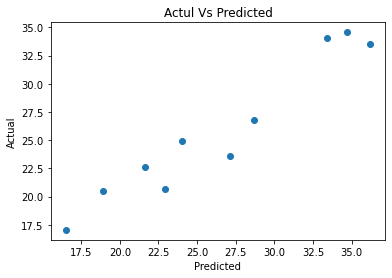

In [23]:
import matplotlib.pyplot as plt

predicted = newPredictions.iloc[:,-1]     # Last column
actual = newPredictions.iloc[:,-2]        # 2nd last column

plt.scatter(actual, predicted)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actul Vs Predicted')
plt.savefig("result-scatter-plot.jpg", dpi=300)
plt.show()

---
### **4.6 "Save" the prediction results to csv** 
---

In [24]:
newPredictions.to_csv("NewPredictions.csv")
print("Result saved in NewPredictions.csv")

Result saved in NewPredictions.csv


---
### **4.7 Download the "result file" to user local system** 
---

In [25]:
from google.colab import files
#files.download('NewPredictions.csv')      # Uncomment this line

---
### **4.8 "Save" the trained model** 
---

In [26]:
sm = save_model(rfModel, 'rfModelFile')

Transformation Pipeline and Model Succesfully Saved


---
### **4.9 Download the "trained model file" to user local system** 
---

In [27]:
from google.colab import files
#files.download('rfModelFile.pkl')           # Uncomment this line

---
### **4.10  "Upload the trained model" --> "Load the model"  --> "Make the prediction" on "new unseen dataset"** 
---
#### **4.10.1 Upload the  "Trained Model"**


In [28]:
from google.colab import files
#files.upload()                    # Uncomment this line

#### **4.10.2 Load the "Model"**

In [29]:
#rfModel = load_model('rfModelFile (1)')        # Uncomment this line

#### **4.10.3 Make the prediction on "new unseen dataSet"**

In [30]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.909000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.659000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.569000
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,34.075001
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,33.558001
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,26.815000
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,20.649000
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,23.586000
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,17.040000
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,20.500000


---
# **5. Plot the trained model**
---
**Following parameters can be plot for a trained model**

- Prediction Error Plot    - 'error'
- Learning Curve           - 'learning'
- Validation Curve         - 'vc'
- Feature Importance       - 'feature'
- Model Hyperparameter     - 'parameter'

---
### **5.1 Create RandomForest model or any other model**
---

In [31]:
rfModel = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.7594,15.8563,3.9820,0.8424,0.1654,0.1213
1,2.2417,8.2295,2.8687,0.9022,0.1413,0.1150
2,1.8582,5.6195,2.3705,0.8681,0.1180,0.1035
3,2.7891,13.1664,3.6285,0.8985,0.1763,0.1424
4,2.2011,10.0233,3.1660,0.8423,0.1790,0.1318
5,2.2226,8.5553,2.9249,0.9101,0.1143,0.1018
6,2.5748,10.9359,3.3070,0.8926,0.1366,0.1070
7,2.2481,13.3049,3.6476,0.8668,0.1349,0.0984
8,2.5868,23.4571,4.8433,0.6572,0.1666,0.1290
9,1.9072,5.4180,2.3277,0.9099,0.1411,0.1148


---
### **5.2 Plot the "error"**
---

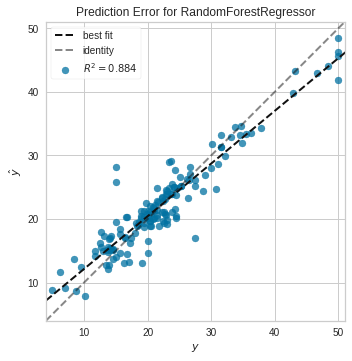

In [32]:
plot_model(rfModel, plot='error')

---
### **5.3 Plot the "learning curve"**
---

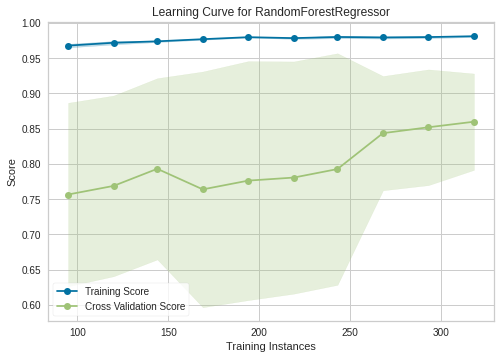

In [33]:
plot_model(rfModel, plot='learning')

---
### **5.4 Plot the "validation curve"**
---

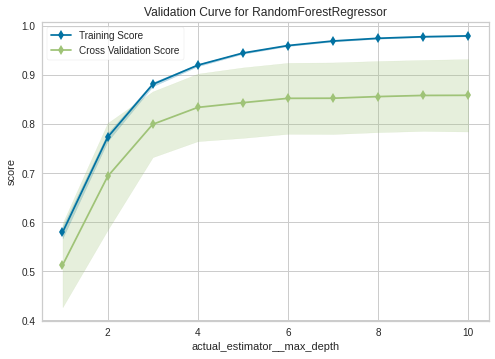

In [34]:
plot_model(rfModel, plot='vc')

---
### **5.5 Get the model "parameters"**
---

In [35]:
plot_model(rfModel, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


---
### **5.6 Explore the more parameters of "plot_model()" on pycaret**
---
**<a href="https://pycaret.org/regression/#plot-model"> Click Here </a>**

---
# **6. Feature Importance**
---
#### **6.1 Feature Importance using "Random Forest"**


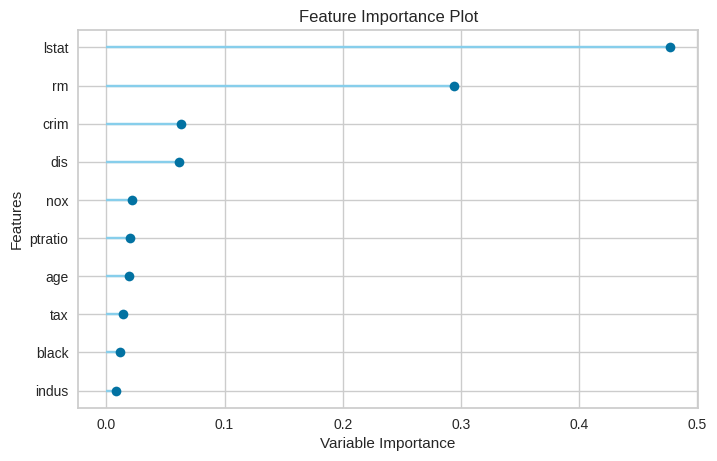

In [36]:
rfModel = create_model('rf', verbose=False)
plot_model(rfModel, plot='feature')

---
### **6.2 Feature Importance using "Extra Trees Regressor"**
---

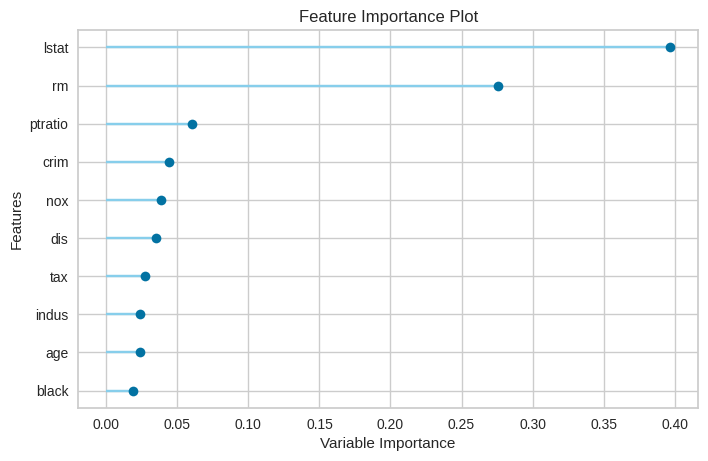

In [37]:
etModel = create_model('et', verbose=False)
plot_model(etModel, plot='feature')

---
### **6.3 Feature Importance using "Decision Tree"**
---

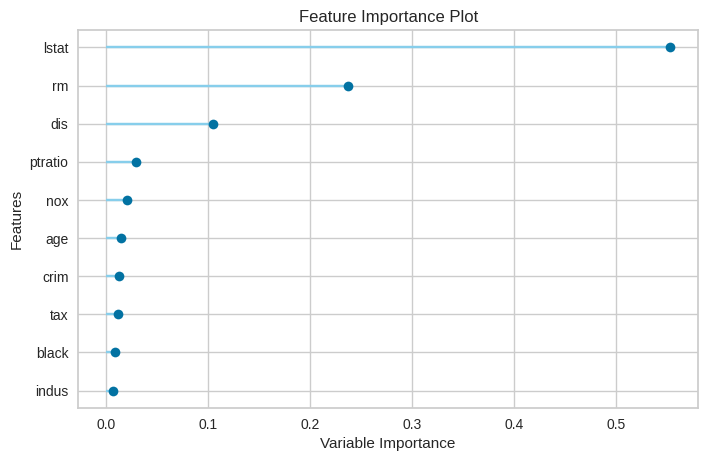

In [38]:
dtModel = create_model('dt', verbose=False)
plot_model(dtModel, plot='feature')

---
# **7. Tune/Optimize the model performance**
---
### **7.1 Train "Decision Tree" with default parameters**


In [39]:
dtModel = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.4667,29.6617,5.4463,0.7052,0.1832,0.1444
1,2.9194,16.9425,4.1161,0.7987,0.2130,0.1512
2,2.5889,10.6833,3.2685,0.7492,0.1530,0.1361
3,3.5139,24.2647,4.9259,0.8129,0.2564,0.1942
4,3.3800,18.8786,4.3449,0.7031,0.2020,0.1784
5,2.5857,10.9466,3.3086,0.8850,0.1428,0.1272
6,2.9829,13.0960,3.6188,0.8713,0.1663,0.1409
7,3.0114,16.2029,4.0253,0.8377,0.1722,0.1330
8,4.4229,58.8400,7.6707,0.1400,0.2625,0.2064
9,2.3857,13.6831,3.6991,0.7724,0.1885,0.1192


#### **Get the "parameters" of Decision Tree**

In [40]:
plot_model(dtModel, plot='parameter')

,Parameters
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


---
### **7.2 Tune "Decision Tree" model**
---

In [41]:
dtModelTuned = tune_model(dtModel, n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.2653,21.6669,4.6548,0.7847,0.2089,0.1507
1,2.9194,15.6582,3.9570,0.8140,0.1981,0.1522
2,2.6514,13.2165,3.6354,0.6897,0.1822,0.1478
3,3.7833,24.5211,4.9519,0.8109,0.2355,0.1829
4,2.8671,15.2154,3.9007,0.7607,0.1952,0.1634
5,2.9871,12.4298,3.5256,0.8694,0.1620,0.1423
6,2.7886,14.9694,3.8690,0.8529,0.1765,0.1270
7,2.6414,14.7412,3.8394,0.8524,0.1709,0.1283
8,2.6186,23.0605,4.8021,0.6630,0.1690,0.1316
9,2.9871,23.5919,4.8572,0.6076,0.1934,0.1561


#### **Get the "tuned parameters" of Decision Tree**

In [42]:
plot_model(dtModelTuned, plot='parameter')

,Parameters
ccp_alpha,0.0
criterion,mae
max_depth,11
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0.01
min_impurity_split,None
min_samples_leaf,2
min_samples_split,2
min_weight_fraction_leaf,0.0


---
### **7.3 Explore more parameters of "tune_model()" on pycaret**
---
**<a href="https://pycaret.org/regression/#tune-model"> Click Here </a>**

---
# **8. Deploy the model on AWS**
---
**<a href="https://pycaret.org/regression#deploy-model">Click Here</a>**
